<a href="https://colab.research.google.com/github/moaoa/tensorflow-fundamentals/blob/main/Regression_with_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.15.0


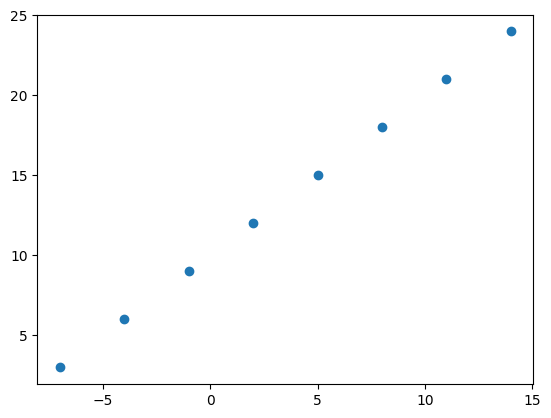

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
Y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

plt.scatter(X, Y)

In [3]:
# Example input and output shapes of a regression model
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [4]:
house_info.shape

TensorShape([3])

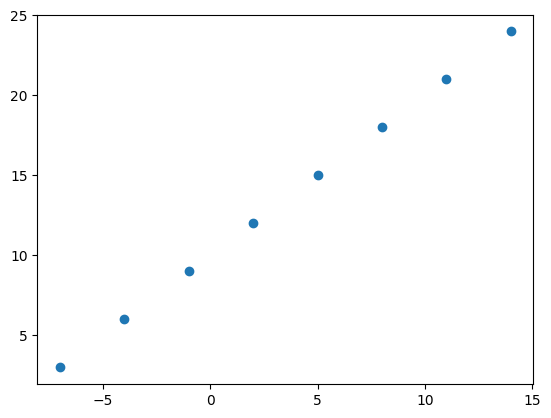

In [5]:
X = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

Y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

plt.scatter(X, Y)

In [6]:
input_shape = X[0].shape

output_shape = Y[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

**Creating a model** - piece together the layers of a neural network yourself (using the Functional or Sequential API) or import a previously built model (known as transfer learning).

**Compiling a model** - defining how a models performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).

**Fitting a model** - letting the model try to find patterns in the data (how does X get to y).

In [7]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(
    loss=tf.keras.losses.mae, # mean absolute error
    optimizer=tf.keras.optimizers.SGD(), # Stochastic Gradient Descent
    metrics=["mae"]
)

# Fit the model

model.fit(tf.expand_dims(X, axis=-1), Y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 11.0837 - mae: 11.0837
Epoch 2/5
1/1 [==============================] - 0s 24ms/step - loss: 10.9512 - mae: 10.9512
Epoch 3/5
1/1 [==============================] - 0s 22ms/step - loss: 10.8187 - mae: 10.8187
Epoch 4/5
1/1 [==============================] - 0s 13ms/step - loss: 10.6862 - mae: 10.6862
Epoch 5/5
1/1 [==============================] - 0s 12ms/step - loss: 10.5537 - mae: 10.5537


In [8]:
model.predict([17.0])

1/1 [==============================] - 0s 304ms/step


array([[14.761329]], dtype=float32)

### Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.

2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.

3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or no more data (give the model more examples to learn from).


In [9]:
tf.random.set_seed(42)


model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1),
])

model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

model.fit(tf.expand_dims(X, axis=-1), Y, epochs=10)

Epoch 1/10
1/1 [==============================] - 1s 948ms/step - loss: 12.8516 - mae: 12.8516
Epoch 2/10
1/1 [==============================] - 0s 37ms/step - loss: 12.2962 - mae: 12.2962
Epoch 3/10
1/1 [==============================] - 0s 25ms/step - loss: 11.7306 - mae: 11.7306
Epoch 4/10
1/1 [==============================] - 0s 17ms/step - loss: 11.1523 - mae: 11.1523
Epoch 5/10
1/1 [==============================] - 0s 20ms/step - loss: 10.5554 - mae: 10.5554
Epoch 6/10
1/1 [==============================] - 0s 19ms/step - loss: 9.9332 - mae: 9.9332
Epoch 7/10
1/1 [==============================] - 0s 20ms/step - loss: 9.2810 - mae: 9.2810
Epoch 8/10
1/1 [==============================] - 0s 19ms/step - loss: 8.5916 - mae: 8.5916
Epoch 9/10
1/1 [==============================] - 0s 16ms/step - loss: 7.8655 - mae: 7.8655
Epoch 10/10
1/1 [==============================] - 0s 16ms/step - loss: 7.0896 - mae: 7.0896


In [10]:
X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [11]:
model.predict([17.0])

1/1 [==============================] - 0s 274ms/step


array([[23.151482]], dtype=float32)

In [12]:
tf.random.set_seed(42)


model = tf.keras.Sequential([
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(1),
])

model.compile(
    loss=tf.keras.losses.mae,
    # optimizer=tf.keras.optimizers.SGD(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["mae"]
)

model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 14.3096 - mae: 14.3096
Epoch 2/100
1/1 [==============================] - 0s 34ms/step - loss: 13.6386 - mae: 13.6386
Epoch 3/100
1/1 [==============================] - 0s 36ms/step - loss: 12.9667 - mae: 12.9667
Epoch 4/100
1/1 [==============================] - 0s 26ms/step - loss: 12.2914 - mae: 12.2914
Epoch 5/100
1/1 [==============================] - 0s 45ms/step - loss: 11.6106 - mae: 11.6106
Epoch 6/100
1/1 [==============================] - 0s 50ms/step - loss: 10.9225 - mae: 10.9225
Epoch 7/100
1/1 [==============================] - 0s 28ms/step - loss: 10.2251 - mae: 10.2251
Epoch 8/100
1/1 [==============================] - 0s 28ms/step - loss: 9.5163 - mae: 9.5163
Epoch 9/100
1/1 [==============================] - 0s 31ms/step - loss: 8.7940 - mae: 8.7940
Epoch 10/100
1/1 [==============================] - 0s 26ms/step - loss: 8.0558 - mae: 8.0558
Epoch 11/100
1/1 [==============================] - 0s 30

In [13]:
model.predict([17.0])

1/1 [==============================] - 0s 199ms/step


array([[26.504078]], dtype=float32)

### **The learning rate is very important**

### **Evaluating a model**
> Visualize

It's a good idea to visualize:


*   The  data - what data are we workign
  with?
*   The model itself - what does our model look like?
*   The training of a model - how does a model perform while it learns?
*   The predictions of the model - how do the predictios of a model line up against what is should be

In [14]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [15]:
# Make labesl for the dataset
Y = X + 10
Y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

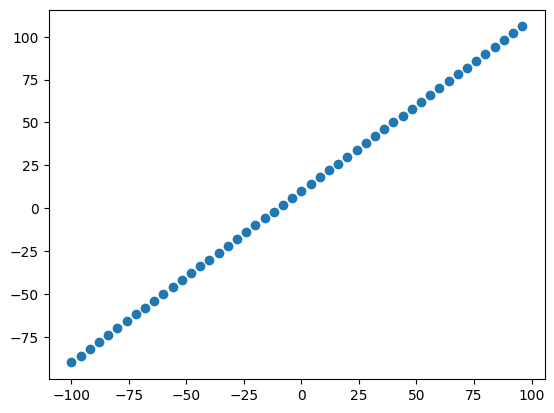

In [16]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X, Y)

### The 3 sets...
*   Trainnig set 70-80%
*   Validatio set (10-15%) - the model gets tuned on this data
*   Test set - the model gets evaluated on this data to test what is has learned, this set is typically 10-15% ot total data.

In [17]:
# Check the length of how many samples we have
len(X)

50

In [18]:
# Split the data into train and test sets
X_train = X[:40] # first 40 (80%)
Y_train = Y[:40]

Y_test = Y[40:]
X_test = X[40:] # first 40 (20%)

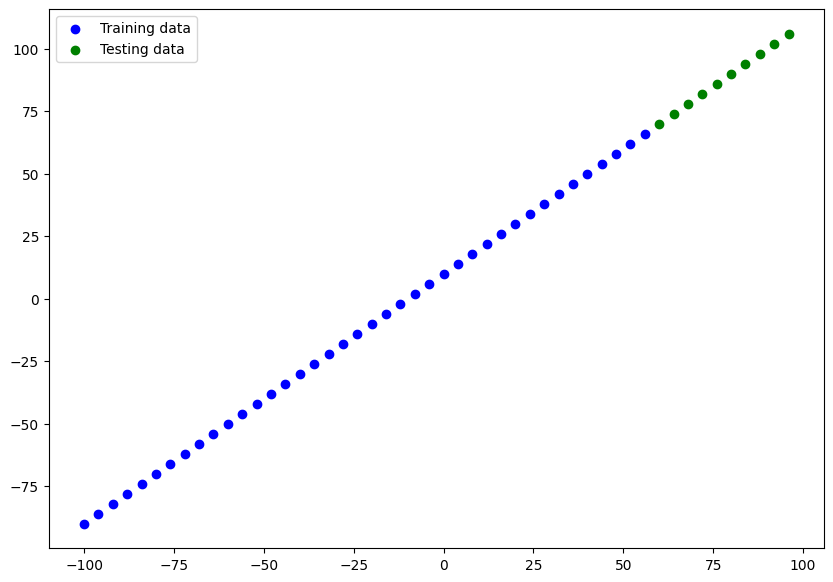

In [19]:
plt.figure(figsize=(10, 7))

# plot training data in blue
plt.scatter(X_train, Y_train, c="b", label="Training data")

# plot test data in green
plt.scatter(X_test, Y_test, c="g", label="Testing data")
# Show  a legend
plt.legend()


In [20]:
# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

# Fit the model
model.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 21ms/step - loss: 21.9641 - mae: 21.9641
Epoch 2/100
2/2 [==============================] - 0s 26ms/step - loss: 9.4447 - mae: 9.4447
Epoch 3/100
2/2 [==============================] - 0s 13ms/step - loss: 11.9699 - mae: 11.9699
Epoch 4/100
2/2 [==============================] - 0s 16ms/step - loss: 9.1681 - mae: 9.1681
Epoch 5/100
2/2 [==============================] - 0s 15ms/step - loss: 10.0178 - mae: 10.0178
Epoch 6/100
2/2 [==============================] - 0s 11ms/step - loss: 9.2977 - mae: 9.2977
Epoch 7/100
2/2 [==============================] - 0s 24ms/step - loss: 8.4588 - mae: 8.4588
Epoch 8/100
2/2 [==============================] - 0s 14ms/step - loss: 9.0299 - mae: 9.0299
Epoch 9/100
2/2 [==============================] - 0s 10ms/step - loss: 18.4819 - mae: 18.4819
Epoch 10/100
2/2 [==============================] - 0s 11ms/step - loss: 9.9605 - mae: 9.9605
Epoch 11/100
2/2 [==============================] - 0s 10ms/s

In [21]:
# Visualize the model
model.summary()
# video: 05:38

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [70]:
# Create a model
model = tf.keras.Sequential([
    # (let's try and play with the dense units)
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1, name="output_layer")

], name="model-1")

# Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["mae"]
)

# Fit the model
model.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=200, verbose=0)

In [23]:
#5:50

In [48]:
model.summary()

Model: "model-1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 20)                40        
                                                                 
 output_layer (Dense)        (None, 1)                 21        
                                                                 
Total params: 61 (244.00 Byte)
Trainable params: 61 (244.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


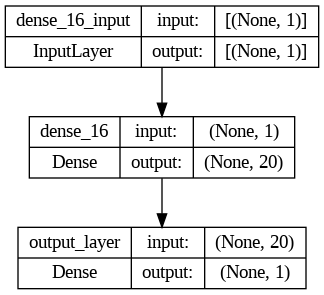

In [49]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

### Visualizing our model predictions

To visualize predictiosn, it's a good idea to plot them against the gorund truth labels.

Often you'ill see this in the form of y_test or y_true versus y_pred (ground truth versus  your model's predicitons)


In [51]:
# Make somoe predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 45ms/step


array([[ 91.30606 ],
       [ 97.268234],
       [103.230446],
       [109.192635],
       [115.154816],
       [121.117004],
       [127.07921 ],
       [133.0414  ],
       [139.00359 ],
       [144.96579 ]], dtype=float32)

In [53]:
Y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [62]:
# Let's create a plotting function
def plot_predictions(
                     train_data=X_train,
                     train_labels=Y_train,
                     test_data=X_test,
                     test_labels=Y_test,
                     predictions=y_pred
                     ):
  plt.figure(figsize=(10, 7))
  # plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  plt.legend()

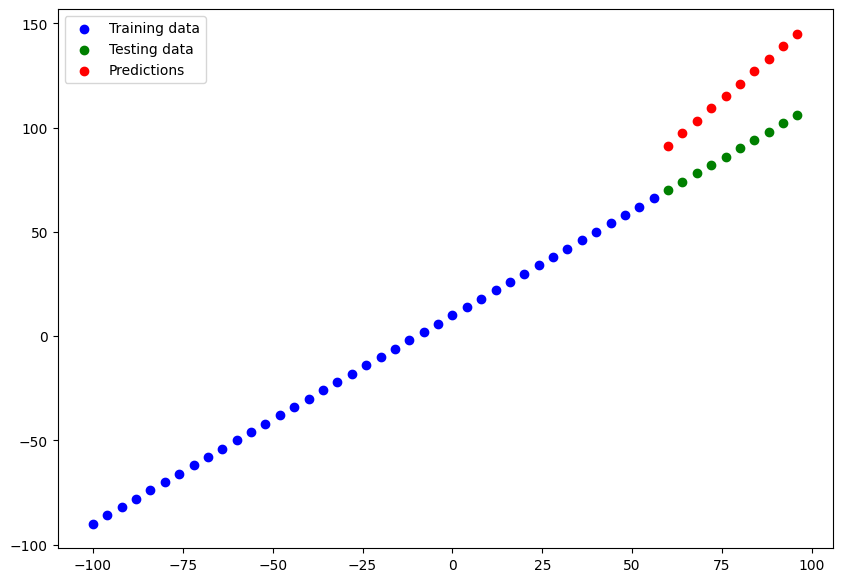

In [71]:
plot_predictions()

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* MAE - MEAN ABSOLUTE ERROR, "on average, how wrong is each of my model's predictions"
* MSE - mean square root: square the average error

In [72]:
# Evaluate the model on the test
model.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 225ms/step - loss: 0.1272 - mae: 0.1272


[0.1271965056657791, 0.1271965056657791]

In [77]:
# Calculate the mean absolute error
tf.metrics.mean_absolute_error(y_pred=tf.constant(y_pred), y_true=Y_test)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([10.261212, 12.107294, 15.784357, 21.192635, 27.154816, 33.117004,
       39.07921 , 45.041397, 51.003586, 56.96579 ], dtype=float32)>

In [79]:
# they don't have the same shape
tf.constant(y_pred), Y_test

(<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[ 91.30606 ],
        [ 97.268234],
        [103.230446],
        [109.192635],
        [115.154816],
        [121.117004],
        [127.07921 ],
        [133.0414  ],
        [139.00359 ],
        [144.96579 ]], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [80]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 91.30606 ,  97.268234, 103.230446, 109.192635, 115.154816,
       121.117004, 127.07921 , 133.0414  , 139.00359 , 144.96579 ],
      dtype=float32)>

In [87]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(
    y_true=Y_test,
    y_pred=tf.squeeze(y_pred) # we have to squeeze the y_pred to remove the last dim
  )
mae

<tf.Tensor: shape=(), dtype=float32, numpy=30.13592>

In [90]:
# Calculate the mean square error
mse = tf.metrics.mean_squared_error(
      y_true=Y_test,
      y_pred=tf.squeeze(y_pred)
    )
mse

<tf.Tensor: shape=(), dtype=float32, numpy=939.9377>

In [103]:
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

### Running experiments to improve our model
~~~
Build a mdoel -> fit it -> evaluate it -> teak it -> fit it -> evaluate it -> tweak it ...


1. Get more data
2. Make you rmodel larger (more layers, more hidden units for each layer)
3. Train for longer give your model more of a chance to find patterens in the data

In [96]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the mdoel
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])
# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 28ms/step - loss: 51.4325 - mae: 51.4325
Epoch 2/100
2/2 [==============================] - 0s 16ms/step - loss: 18.2802 - mae: 18.2802
Epoch 3/100
2/2 [==============================] - 0s 21ms/step - loss: 10.0563 - mae: 10.0563
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 9.5658 - mae: 9.5658
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 10.4730 - mae: 10.4730
Epoch 6/100
2/2 [==============================] - 0s 19ms/step - loss: 9.7006 - mae: 9.7006
Epoch 7/100
2/2 [==============================] - 0s 19ms/step - loss: 8.7978 - mae: 8.7978
Epoch 8/100
2/2 [==============================] - 0s 15ms/step - loss: 9.0739 - mae: 9.0739
Epoch 9/100
2/2 [==============================] - 0s 19ms/step - loss: 19.3005 - mae: 19.3005
Epoch 10/100
2/2 [==============================] - 0s 14ms/step - loss: 10.4274 - mae: 10.4274
Epoch 11/100
2/2 [==============================] - 0s 22ms

1/1 [==============================] - 0s 121ms/step


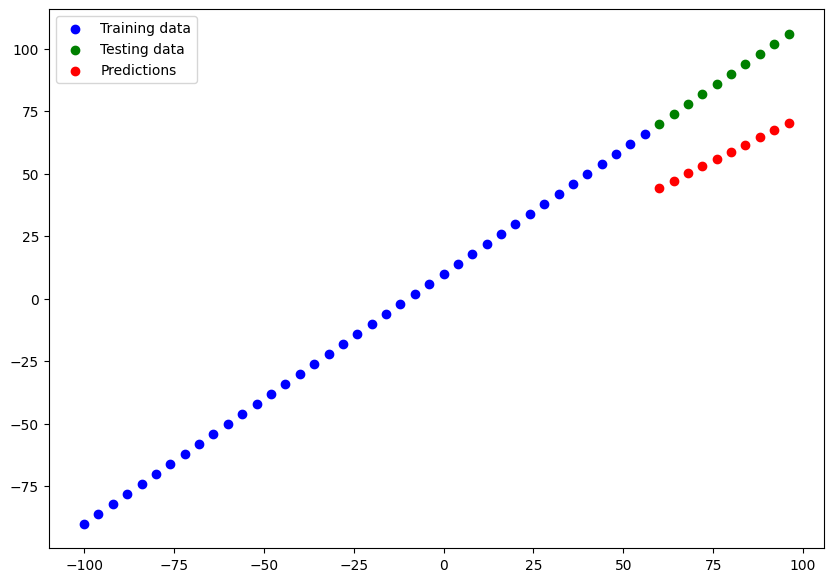

In [97]:
# Make and plot predictions
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [105]:
mae_1 = mae(Y_test, y_preds_1)
mse_1 = mse(Y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=30.637592>,
 <tf.Tensor: shape=(), dtype=float32, numpy=949.09827>)

In [ ]:
# 6:39